# Logistic regression and ROC curve

## In this notebook we present a simple analysis using logisitic regression and generating its associated ROC curve along with some metrics associated with the curve. We will use the affair data set: http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

### We first import some python libraries we will need for our analysis

In [1]:
# Numpy for scientific computing
import numpy as np
# Pandas for data analysis
import pandas as pd
# Statsmodels for statistics
import statsmodels.api as sm
# Matplotlib for plotting
import matplotlib.pyplot as plt
# Patsy for statistical models
from patsy import dmatrices
# Many tools from sci-kit learn, such as:
# Logistic regression...
from sklearn.linear_model import LogisticRegression
# Spliting training sets
from sklearn.cross_validation import train_test_split
# Metrics for score functions
from sklearn import metrics
# Cross-validation
from sklearn.cross_validation import cross_val_score
# In case we decide to use ggplot for plotting
from ggplot import *
# Since we are doing classification we will do ROC curve and area under it
from sklearn.metrics import roc_curve, auc
# Label_binarize in case we need to do more than two classes in our classification problem
from sklearn.preprocessing import label_binarize
# In case we do a multi-classification system, we will follow a one-versus-rest approach
from sklearn.multiclass import OneVsRestClassifier
# It is always useful to have a support vector machine system handy
from sklearn import svm
# We also make sure we show the plots in the notebook
%matplotlib inline

### The extract of the data set utilized is shown below. Such a data set can be either downloaded from the shown website or directly imported from the pandas library; we  opt for the latter.

In [2]:
# For this analysis we will use the affair data set
# http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html
# The extract of the data set is as follows:
# Number of observations: 6366
# Number of variables: 9
# Variable name definitions:
#
#    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
#                    4 = good, 5 = very good
#    age             : Age
#    yrs_married     : No. years married. Interval approximations. See
#                    original paper for detailed explanation.
#    children        : No. children
#    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
#                    4 = strongly
#    educ            : Level of education, 9 = grade school, 12 = high
#                    school, 14 = some college, 16 = college graduate,
#                    17 = some graduate school, 20 = advanced degree
#    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
#                    or unskilled worker; 3 = white-colloar; 4 = teacher
#                    counselor social worker, nurse; artist, writers;
#                    technician, skilled worker, 5 = managerial,
#                    administrative, business, 6 = professional with
#                    advanced degree
#    occupation_husb : Husband's occupation. Same as occupation.
#    affairs         : measure of time spent in extramarital affairs
#
#
# We load the data set
dta = sm.datasets.fair.load_pandas().data
#
# For our analysis we add an extra column named "affair"
# It will be a binary column being either 1 or 0 correspodning, respectively,
# to having an affair and not having an affair
# 
dta['affair'] = (dta.affairs > 0).astype(int)

### We display the first 10 rows of the data frame to get an idea of the data we are dealing with

In [3]:
dta[:10]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3,32,9.0,3.0,3,17,2,5,0.111111,1
1,3,27,13.0,3.0,1,14,3,4,3.230769,1
2,4,22,2.5,0.0,1,16,3,5,1.400000,1
3,4,37,16.5,4.0,3,16,5,5,0.727273,1
4,5,27,9.0,1.0,1,14,3,4,4.666666,1
5,4,27,9.0,0.0,2,14,3,4,4.666666,1
6,5,37,23.0,5.5,2,12,5,4,0.852174,1
7,5,37,23.0,5.5,2,12,2,3,1.826086,1
8,3,22,2.5,0.0,2,12,3,3,4.799999,1
9,3,27,6.0,0.0,1,16,3,5,1.333333,1


### We now present the means grouped by affair

In [4]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


### We do something similar for rate_marriage

In [5]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


### Let's generate histograms of marriage rating, education and affairs

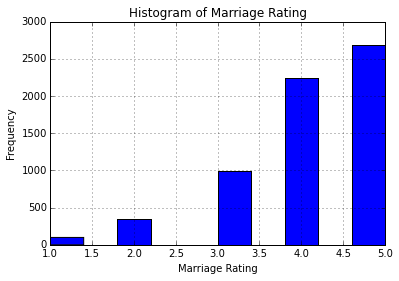

In [6]:
# Histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

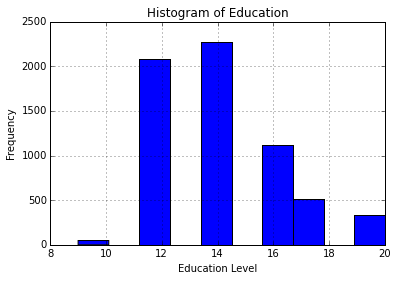

In [7]:
# Histogram for education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

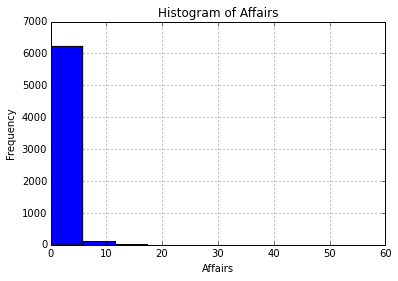

In [8]:
# Histogram for affairs
dta.affairs.hist()
plt.title('Histogram of Affairs')
plt.xlabel('Affairs')
plt.ylabel('Frequency')

### We now show a barplot of marriage rating grouped by affair, that is, grouped in two categories:  affair(true) and no affair(not true)

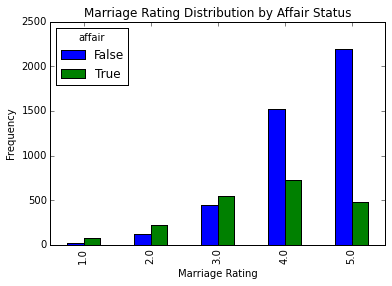

In [9]:
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

### Let's generate abar plot to showing percetage of affairs with respect years of marriage

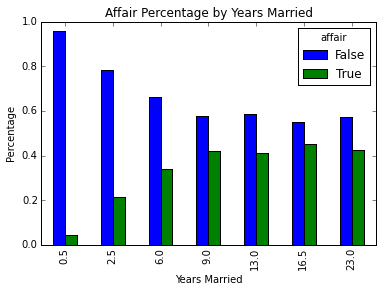

In [10]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

### In order to prepare the data for logistic regression we add an intercept column as well as dummy  variables for occupation  and occupation_husb, which are categorical variables. We can use the patsy module to use a formula language; we use dmatrices function from the  patsy module http://patsy.readthedocs.org/en/latest/  The formulas have a similar strucuture as the ones in R: y ~ x1 + x2 + x3 Let's now create dataframes with an intercept column and dummy variables for occupation and occupation_husb

In [11]:
# Notice that we specify the categorical nature of occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
# Let's see columns of X
print X.columns

Index([u'Intercept', u'C(occupation)[T.2.0]', u'C(occupation)[T.3.0]',
       u'C(occupation)[T.4.0]', u'C(occupation)[T.5.0]',
       u'C(occupation)[T.6.0]', u'C(occupation_husb)[T.2.0]',
       u'C(occupation_husb)[T.3.0]', u'C(occupation_husb)[T.4.0]',
       u'C(occupation_husb)[T.5.0]', u'C(occupation_husb)[T.6.0]',
       u'rate_marriage', u'age', u'yrs_married', u'children', u'religious',
       u'educ'],
      dtype='object')


In [12]:
# We rename the names of coulumns in X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_02',
                        'C(occupation)[T.3.0]':'occ_03',
                        'C(occupation)[T.4.0]':'occ_04',
                        'C(occupation)[T.5.0]':'occ_05',
                        'C(occupation)[T.6.0]':'occ_06',
                        'C(occupation_husb)[T.2.0]':'occ_husb_02',
                        'C(occupation_husb)[T.3.0]':'occ_husb_03',
                        'C(occupation_husb)[T.4.0]':'occ_husb_04',
                        'C(occupation_husb)[T.5.0]':'occ_husb_05',
                        'C(occupation_husb)[T.6.0]':'occ_husb_06'})

In [13]:
# We check the changes took effect
X[:10]

,Intercept,occ_02,occ_03,occ_04,occ_05,occ_06,occ_husb_02,occ_husb_03,occ_husb_04,occ_husb_05,occ_husb_06,rate_marriage,age,yrs_married,children,religious,educ
0,1,1,0,0,0,0,0,0,0,1,0,3,32,9.0,3.0,3,17
1,1,0,1,0,0,0,0,0,1,0,0,3,27,13.0,3.0,1,14
2,1,0,1,0,0,0,0,0,0,1,0,4,22,2.5,0.0,1,16
3,1,0,0,0,1,0,0,0,0,1,0,4,37,16.5,4.0,3,16
4,1,0,1,0,0,0,0,0,1,0,0,5,27,9.0,1.0,1,14
5,1,0,1,0,0,0,0,0,1,0,0,4,27,9.0,0.0,2,14
6,1,0,0,0,1,0,0,0,1,0,0,5,37,23.0,5.5,2,12
7,1,1,0,0,0,0,0,1,0,0,0,5,37,23.0,5.5,2,12
8,1,0,1,0,0,0,0,1,0,0,0,3,22,2.5,0.0,2,12
9,1,0,1,0,0,0,0,0,0,1,0,3,27,6.0,0.0,1,16


In [14]:
# We now flatten y into a 1-D array
y = np.ravel(y)
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

### We are now in a position of performing a logistic regression to fit y as a function of X. After doing the logistic regression we compute the model score

In [15]:
# Define the model as a Logistic regression
model1 = LogisticRegression()
# and do the fitting
model1 = model1.fit(X, y)
# We now check the accuracy on the training set
model1_score = model1.score(X, y)
print "Model score = " , model1_score 
print "Model score percentage = " , round(model1_score*100,0),'%'

Model score =  0.72588752749
Model score percentage =  73.0 %


### These reveals that we have a 73 % of accuracy. Let's now see what percentage have had affairs

In [16]:
# Since y consists only of 1's and 0's we determine the perecentage that
# have had affairs as the mean of y
print "Percentage of women who have had affairs = " , round(y.mean()*100,0),'%'

Percentage of women who have had affairs =  32.0 %


### This inidicates that 32% of women have had affairs, meaning that could have predicted 68% of accuracy by always predicting NO. In other words, we are doing slighly better than the null error base. Let's now see the cofficients resulting from the regression

In [17]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,Intercept,[1.48983609477]
1,occ_02,[0.188066272119]
2,occ_03,[0.498947772456]
3,occ_04,[0.25066839921]
4,occ_05,[0.839007917871]
5,occ_06,[0.83390840317]
6,occ_husb_02,[0.190635683787]
7,occ_husb_03,[0.297832449691]
8,occ_husb_04,[0.161408592841]
9,occ_husb_05,[0.187770652786]


### From the coefficients we learn that increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair.  For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

### Let's now split the training set into train and test sets and evaluate the model using such a splitting 

In [18]:
# We use train_test_split for the splitting...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# ... and let's label the results of this new model as model2
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

### We now run our learned model2 on the test set and generate its class probabilities

In [19]:
# We determine predictions with this second model...
predicted2 = model2.predict(X_test)
print predicted2
print "---------"*5
# ... and generate class probabilities for this "second" model
probs2 = model2.predict_proba(X_test)
print probs2

[ 1.  0.  0. ...,  0.  0.  0.]
---------------------------------------------
[[ 0.35142724  0.64857276]
 [ 0.90952443  0.09047557]
 [ 0.72576762  0.27423238]
 ..., 
 [ 0.55737345  0.44262655]
 [ 0.81213732  0.18786268]
 [ 0.74729515  0.25270485]]


### We notice the classifier predicts a 1 (having an affair) any time the probability in the  second column is greater than 0.5.

### We proceed to generate the ROC curve to visualize the performance of our model

### Firstly we generate the predictions from the recently obtained probs2

In [20]:
# Notice we already have gotten the probabilities in the second column of probs2, 
# we just extract them off and save them to preds_roc...
preds_roc = probs2[:,1]
# ... and print them out to check we actually have them
print " === Predicted probabilities === "
print "              "
print preds_roc

 === Predicted probabilities === 
              
[ 0.64857276  0.09047557  0.27423238 ...,  0.44262655  0.18786268
  0.25270485]


### We now get false positive rates (fpr), true positive rates (tpr) and thresholds (thr) associted with the metrics

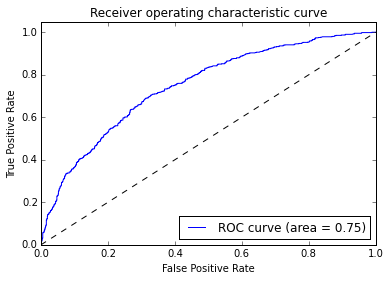

In [21]:
# We get fpr, tpr and thr associated with the metrics and the area under the curve....
fpr, tpr, thr = metrics.roc_curve(y_test, preds_roc)
roc_auc = auc(fpr, tpr)
# ... and finally do the setting for plotting the curve itself:
# We will plot a figure...
plt.figure()
# ...showing tpr vs. fpr...
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ... along with a y = x reference straight line...
plt.plot([0, 1], [0, 1], 'k--')
# ... in the following rectangle
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# ... and with the following labels and legends
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
# Show plot
plt.show()

### Now let's generate some evaluation metrics

In [22]:
# We first use sklearn.metrics.accuracy_score, which returns the fraction 
# of correctly classified samples
print "Fraction of correctly classified samples = " , metrics.accuracy_score(y_test, predicted2,normalize=True)
print "Percentage of correctly classified samples = " , round(metrics.accuracy_score(y_test, predicted2,normalize=True)*100,0),"%"
# We also use sklearn.metrics.roc_auc_score to determine the area under the ROC curve; 
# receiver operating characteristic
# This area, AUC or AUROC, is equal to the probability that a classifier will rank a randomly 
# chosen positive instance higher than a randomly chosen negative one
print "Area under ROC = " , metrics.roc_auc_score(y_test, probs2[:, 1])

Fraction of correctly classified samples =  0.729842931937
Percentage of correctly classified samples =  73.0 %
Area under ROC =  0.74596198609


### Here is the confusion matrix and classification report

In [23]:
# We know get the confusion matrix
#
print " === Confusion matrix === "
print "                          "
print metrics.confusion_matrix(y_test, predicted2)
# 
# We create a classification report showing
# summary of the precision, recall, F1 score for each class.
print "              "
print " === Classification report === "
print metrics.classification_report(y_test, predicted2)

 === Confusion matrix === 
                          
[[1169  134]
 [ 382  225]]
              
 === Classification report === 
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



### Let's now do a k-fold validation analysis

### We first choose the value of k for our k-fold cross-validation

In [24]:
# We set k_cv for the k-fold cross validation
k_cv = 10

### Proceeding to get the scores associated with this k-fold cross-validation

In [25]:
# Scores for this k-fold validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=k_cv)
print " Scores for ",k_cv,"-fold cross-validation"
print scores
print "       "
print " Mean of scores"
print scores.mean()

 Scores for  10 -fold cross-validation
[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
       
 Mean of scores
0.724163068551


### Let's do a similar analysis for different values of k in a k-fold cross-validation

In [26]:
# We set the minium and maximum k-fold cross-validations
k_cv_min= 2
k_cv_max = 12
# And print out mean and std for each fold
for k_cv_count in range(k_cv_min,k_cv_max+1):
    scores_aux = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=k_cv_count)
    #print k_cv_count ,  scores_aux.mean() ,  scores_aux.std()
    print '{0:2d} {1:.3f} {2:.5f}'.format(k_cv_count ,  scores_aux.mean() ,  scores_aux.std())

 2 0.725 0.00902
 3 0.724 0.00702
 4 0.723 0.01021
 5 0.725 0.01370
 6 0.725 0.01634
 7 0.725 0.01350
 8 0.725 0.01432
 9 0.724 0.01759
10 0.724 0.01807
11 0.723 0.02056
12 0.724 0.01828


In [27]:
# How about some other considerations such as:
##
# Reduce number of features?
# Perhaps we now can perform a PCA and then regress over the principal components?
# Regularization?
# Prodcuts of features?